# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Question 1.1

In [3]:
#1.1
df = pd.read_csv("/content/airbnb_hw.csv")
df.head()
var = 'Price'
print('Before coercion: \n', df[var].describe(),'\n')

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



In [4]:
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



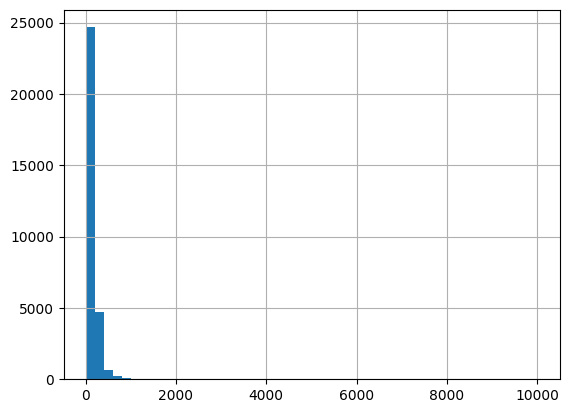

In [5]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['price_nan']),'\n') # How many missing values are there?



Q. Choices I made, and Missing Values

A. I decided to convert the data type from object to numeric, to be able to compute the five number summary. I also removed markings such as $ or commas from the data. The data ended up having one missing value.

##Question 1.2

In [6]:
df1 = pd.read_csv("/content/mn_police_use_of_force.csv")
df1.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [7]:
# Create a missing dummy
df1['Subject.Injury_nan'] = df1['subject_injury'].isnull() # Equals 1 if missing, 0 if non-null
totalmissings = sum(df1['Subject.Injury_nan'])
print('Total Missings: \n', totalmissings, '\n')

Total Missings: 
 9848 



Q. What proportion of the values are missing? Is this a concern?

A. These missing values are a concern because it reflects mass potential underreporting.

In [8]:
# What proportion of the values are missing?
PropMiss = totalmissings/len(df1)
print('Proportion of Values Missing: \n', PropMiss, '\n')

Proportion of Values Missing: 
 0.7619342359767892 



In [27]:
pd.crosstab(df1['subject_injury'], df1['force_type'], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


Q. Are there any patterns regarding when the data are missing?

A. Yes, it appears that the more violent forms of force, have significantly less information on if the subject was injured. This means there is a systematic problem of underreporting and abuse of power.

##Question 1.3
Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

In [10]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [11]:
df.columns = [col.strip() for col in df.columns]
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(' ', np.nan)
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
df['WhetherDefendantWasReleasedPretrial_Dummy'] = df['WhetherDefendantWasReleasedPretrial'].apply(lambda x: 1 if x == 1 else (0 if x == 0 else np.nan))
print(df['WhetherDefendantWasReleasedPretrial'].unique())
print(df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))


[nan  0.  1.]
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


1.4 Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [12]:
df['ImposedSentenceAllChargeInContactEvent'].head()
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(' ', 0)
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].round(2)

I chose to turn the missing values, to 0 because the missing values reflect their sentence not existing in terms of time served. I also decided to round all of the sentences to two decimal points to increase readibility.

##Question 2

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [13]:
#2.1
dfsharks = pd.read_excel('/content/GSAF5 (1).xls')

dfsharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#2.2
dfsharks = dfsharks.dropna(axis=1, how='all')
dfsharks.columns.tolist()
dfsharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking to see if these columns have any real values:

In [15]:
#2.2
if any(x for x in dfsharks['Unnamed: 21'].notna()):
    print('True')
if any(x for x in dfsharks['Unnamed: 22'].notna()):
    print('True')

True
True


 2.3 Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [16]:
#2.3
dfsharks['Year'] = dfsharks['Year'].replace({',': ''}, regex=True)
dfsharks['Year'] = pd.to_numeric(dfsharks['Year'], errors='coerce')
print('After coercion: \n', dfsharks['Year'].describe(),'\n')

After coercion: 
 count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64 



After coercion: 
 count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64 



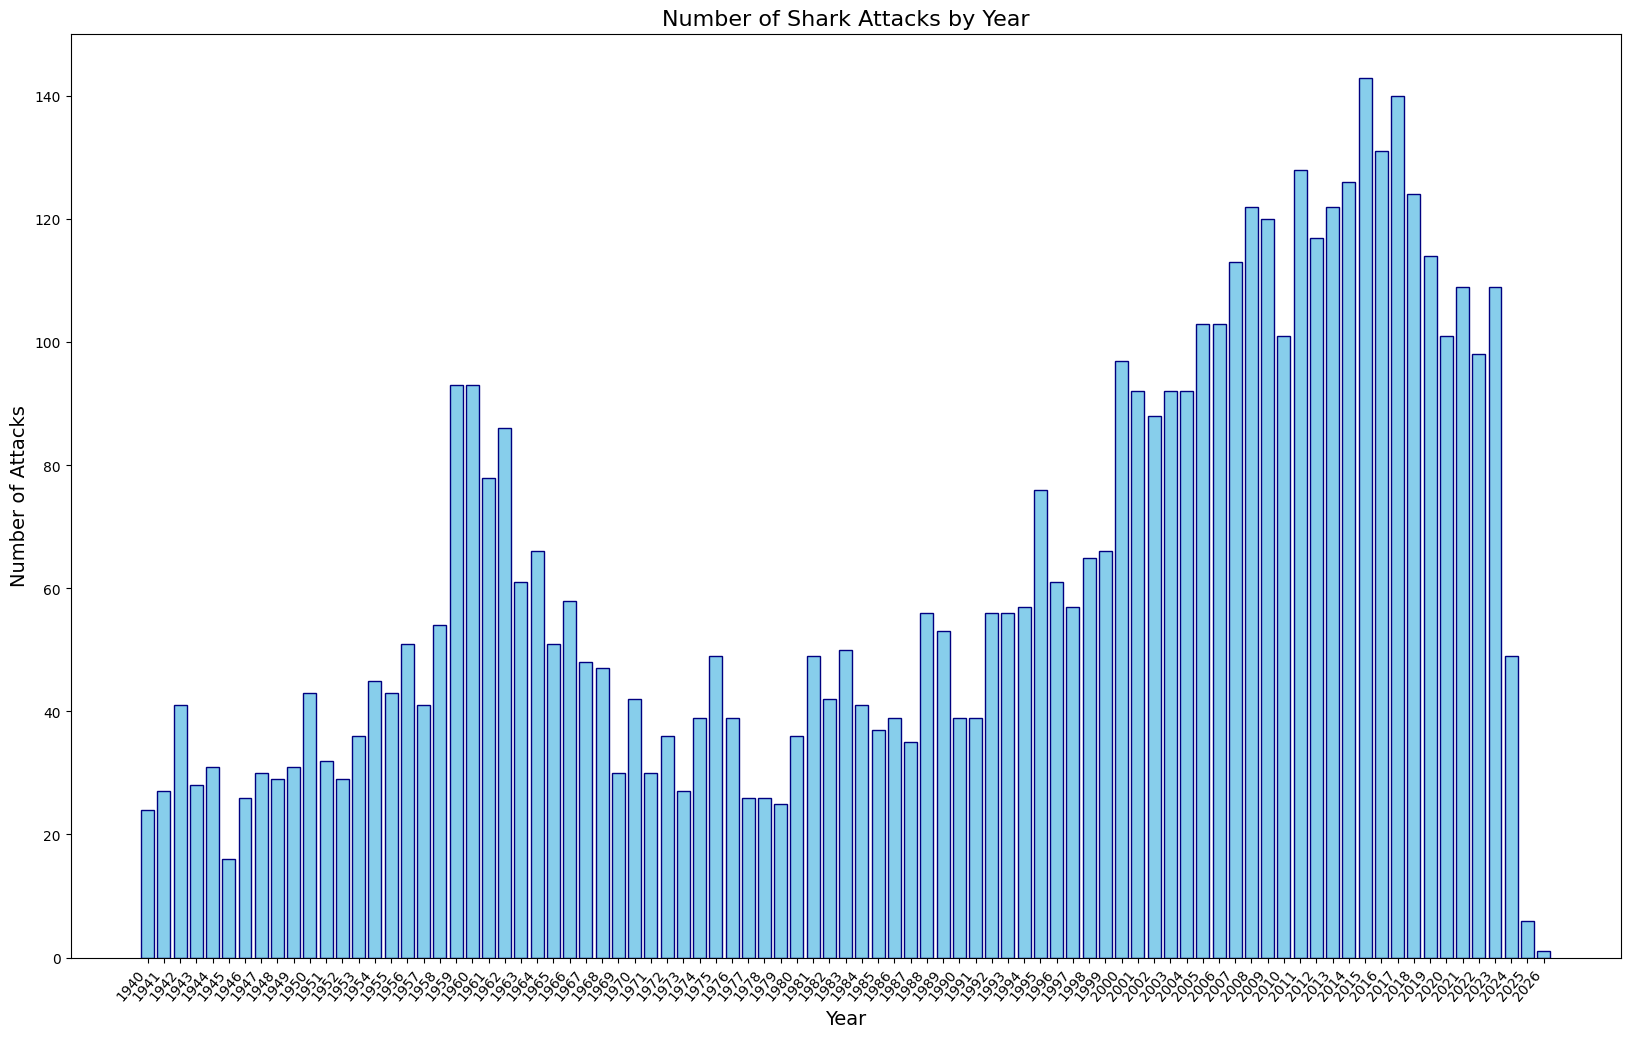

In [17]:
#2.3
dfsharks['Year'] = pd.to_numeric(dfsharks['Year'], errors='coerce')

print('After coercion: \n', dfsharks['Year'].describe(),'\n')



dfsharks = dfsharks[dfsharks['Year'] > 1939]
year_counts = dfsharks['Year'].value_counts().sort_index()


plt.figure(figsize=(20, 12))
plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='navy')


plt.title('Number of Shark Attacks by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(year_counts.index, rotation = 50, ha='right')

plt.show()


It appears that shark attacks have been increasing since the early 90's, though there was a slow decline starting in 2018 with a steep drop in 2024.

2.4 Clean the Age Variable and make a Histogram of the results

After coercion: 
 count    3559.000000
mean       28.540039
std        14.718380
min         1.000000
25%        17.000000
50%        25.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64 

Total Missings: 
 1899 



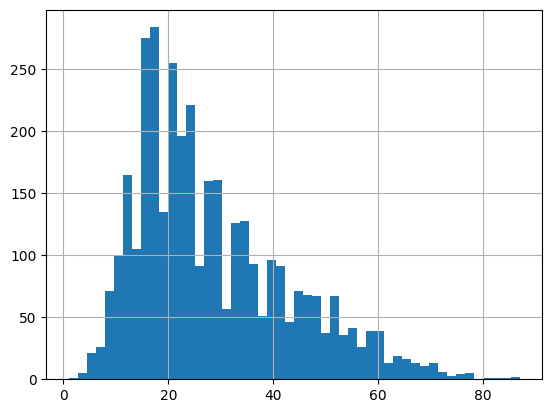

In [18]:
2.4
dfsharks['Age'] = dfsharks['Age'].replace({',': ''}, regex=True)
dfsharks['Age'] = pd.to_numeric(dfsharks['Age'], errors='coerce')
# Create a missing dummy:
dfsharks['Age_nan'] = dfsharks['Age'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', dfsharks['Age'].describe(),'\n') # Describe the numeric variable
dfsharks['Age'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(dfsharks['Age_nan']),'\n')


2.5  What proportion of victims are male?

In [19]:
#2.5
totalmales = sum(dfsharks['Sex'] == 'M')

proportion_male = totalmales / len(dfsharks)
print(f"Proportion of victims who are male: {proportion_male}")

Proportion of victims who are male: 0.7869182850861122


2.6
Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [20]:
dfsharks['Type'] = dfsharks['Type'].str.strip().str.lower()

mapping = {
    'unprovoked': 'Unprovoked',
    'provoked': 'Provoked',
    'unknown': 'Unknown',
}

dfsharks['Type'] = dfsharks['Type'].map(mapping).fillna('Unknown')

unprovoked_count = dfsharks[dfsharks['Type'] == 'Unprovoked'].shape[0]
unknown_count = dfsharks[dfsharks['Type'] == 'Unknown'].shape[0]
total_attacks = dfsharks.shape[0]
proportion_unprovoked = unprovoked_count / total_attacks

print(f"Proportion of unprovoked attacks: {proportion_unprovoked:}")

Proportion of unprovoked attacks: 0.7429461341150605


2.7
Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

In [21]:
dfsharks['Fatal Y/N'] = dfsharks['Fatal Y/N'].str.strip().str.lower()

mapping = {
    'y': 'Y',
    'n': 'N',
    'unknown': 'Unknown',
}

dfsharks['Fatal Y/N'] = dfsharks['Fatal Y/N'].map(mapping).fillna('Unknown')

FATALYES = dfsharks[dfsharks['Fatal Y/N'] == 'Y'].shape[0]
FATALNO = dfsharks[dfsharks['Fatal Y/N'] == 'N'].shape[0]
FATALUNKNOWN= dfsharks[dfsharks['Fatal Y/N'] == 'Unknown'].shape[0]
total_attacks = sum([FATALYES, FATALNO, FATALUNKNOWN])

# This line confirms that all of the values are represented by Y, N, or Unknown
#print(total_attacks)
#print(len(dfsharks))

2.8 Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

A. Sharks are more likely to launch unprovoked attacks on Men.

B. The attack is more likely to be fatal when unprovoked.

C. The attack is more likely to be fatal with a male then a female.

D. I don't really like sharks, I find them scary!

In [22]:
#2.8A
totalunprovoked = dfsharks[dfsharks['Type'] == 'Unprovoked']

totalmales = sum(totalunprovoked['Sex'] == 'M')
proportion_male = totalmales / len(totalunprovoked)
print(f"Proportion of victims who are male: {proportion_male}")

totalfemale = sum(totalunprovoked['Sex'] == 'F')
proportion_female = totalfemale / len(totalunprovoked)
print(f"Proportion of victims who are female: {proportion_female}")

Proportion of victims who are male: 0.8162762022194822
Proportion of victims who are female: 0.14796547472256474


In [23]:
#2.8B
totalfatal = dfsharks[dfsharks['Fatal Y/N'] == 'Y']

fatalunprovoked = totalfatal[totalfatal['Type'] == 'Unprovoked'].shape[0]
proportion_fatalunprovoked = fatalunprovoked / len(totalfatal)
print(f"Proportion of Fatal Attacks that were Unprovoked: {proportion_fatalunprovoked}")

fatalprovoked = totalfatal[totalfatal['Type'] == 'Provoked'].shape[0]
proportion_fatalprovoked = fatalprovoked / len(totalfatal)
print(f"Proportion of Fatal Attacks that were Provoked: {proportion_fatalprovoked}")

Proportion of Fatal Attacks that were Unprovoked: 0.8372379778051788
Proportion of Fatal Attacks that were Provoked: 0.016029593094944512


In [24]:
#2.8B
totalfatal = dfsharks[dfsharks['Fatal Y/N'] == 'Y']

fatalunprovoked = sum(totalfatal['Type'] == 'Unprovoked')
proportion_fatalunprovoked= fatalunprovoked / len(totalfatal)
print(f"Proportion of Fatal Attacks that were Unprovoked: {proportion_fatalunprovoked}")


fatalprovoked = sum(totalfatal['Type'] == 'Provoked')
proportion_fatalprovoked= fatalprovoked / len(totalfatal)
print(f"Proportion of Fatal Attacks that were Provoked: {proportion_fatalprovoked}")

Proportion of Fatal Attacks that were Unprovoked: 0.8372379778051788
Proportion of Fatal Attacks that were Provoked: 0.016029593094944512


In [25]:
#2.8C
#For males
totalfatal = dfsharks[dfsharks['Fatal Y/N'] == 'Y']
totalnotfatal = dfsharks[dfsharks['Fatal Y/N'] == 'N']

fatalmale = totalfatal[totalfatal['Sex'] == 'M'].shape[0]
proportion_fatalmale = fatalmale / len(totalfatal)
print(f"Proportion of Fatal Attacks on Men: {proportion_fatalmale}")

fatalfemale = totalfatal[totalfatal['Sex'] == 'F'].shape[0]
proportion_fatalfemale = fatalfemale/ len(totalfatal)
print(f"Proportion of Fatal Attacks on Females: {proportion_fatalfemale}")


Proportion of Fatal Attacks on Men: 0.7990135635018496
Proportion of Fatal Attacks on Females: 0.10727496917385944


2.9 What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [26]:
dfsharks.columns = [col.strip() for col in dfsharks.columns]
dfsharks['Specieslist'] = dfsharks['Species'].str.split()
white_shark_attacks = dfsharks[dfsharks['Specieslist'].apply(lambda x: 'White' in x if isinstance(x, list) else False)]
totalwhite = white_shark_attacks.shape[0]
proportion_white = totalwhite / len(dfsharks)
print(f"Proportion of White Shark Attacks: {proportion_white:}")


Proportion of White Shark Attacks: 0.08611212898497618


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

The most recent US Census collected data on race through self identification.
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

We gather these kinds of data for policy making, research, and ensuring equitable standards.
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

I think that it was good practice to have people self report their race, but due to self reporting its possible that the data may be wrong or non representative due to no response. It could be adjusted by allowing people to check more than 2 races for better representaation. I think the kind of self reporting and online methods of contacting citizens could be useful for all organizations to gather data.

4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

Currently, the US Census only asks for one's sex via self reporting. It's good that its self reporting, but they should ask a gender identity question to be more inclusive. I think that it was good practice to have people self report their sex, but due to self reporting its possible that the data may be wrong or non representative due to no response.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

I would be considered that this data could be leaked, or that this data may be reported wrong misleading research. The challenges would be non-representation of peoples data in studies. A good practice may be to analyze the responses missing data and try to figure out why their missing, and use these results to alter the census questions.
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

I would be concerned that this algorithm may cause too large of a generality, misinterpreting peoples personal data, and also making harmful assumptions.